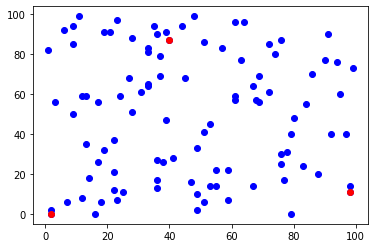

[65, 41, 0]


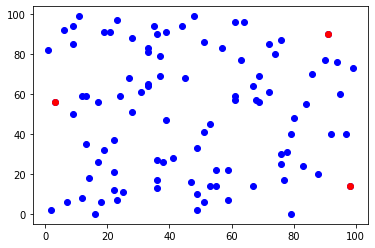

[85, 45, 0]


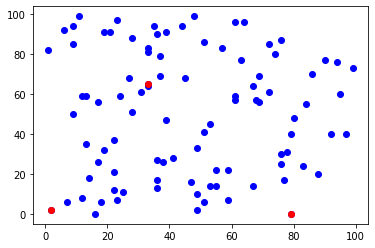

[86, 81, 0]


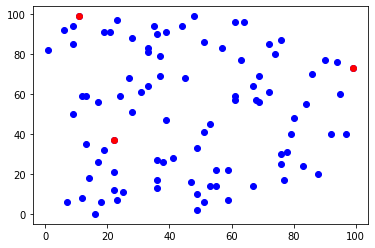

[84, 30, 0]


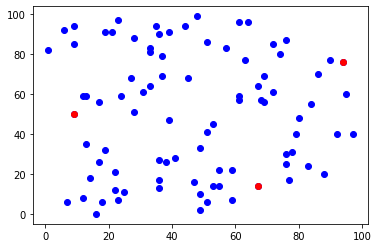

[67, 44, 0]


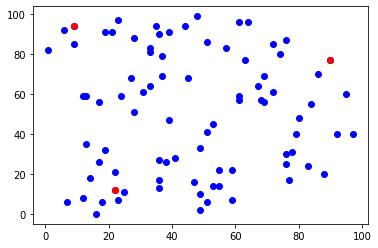

[81, 10, 0]


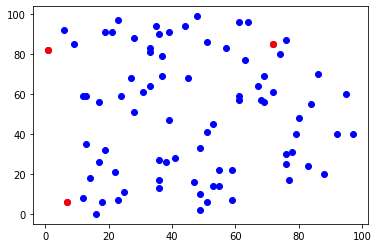

[26, 11, 0]


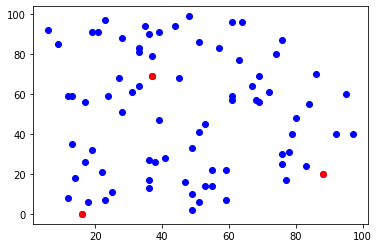

[68, 66, 0]


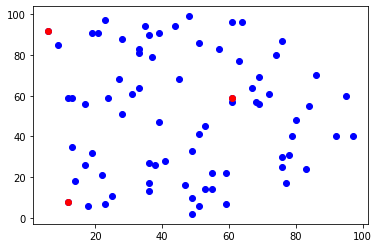

[21, 7, 0]


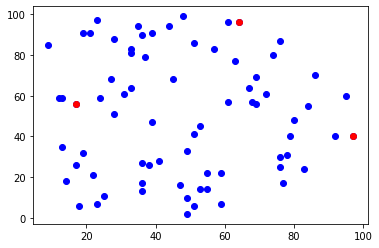

[71, 4, 0]


In [93]:
#k center problem with outliers
import numpy as np
import matplotlib.pyplot as plt
import math 

class KCenterProblemWithOutliers():
  def __init__(self, x_input, y_input) -> None:
    self.x_input, self.y_input = x_input, y_input
    self.NUM_INPUTS = len(x_input)
    self.dists = [[0 for _ in range(self.NUM_INPUTS)] for _ in range(self.NUM_INPUTS)]
    self.selected_samples = []

  def compute_dists(self):
    for r in range(self.NUM_INPUTS):
      for c in range(self.NUM_INPUTS):
        if not r == c:
          self.dists[r][c] = math.sqrt((self.x_input[r] - self.x_input[c])**2 + (self.y_input[r] - self.y_input[c])**2)

  def select_samples(self, query_size):
    def maxindex(dist):
      max_ind = 0
      for i in range(self.NUM_INPUTS):
          if (dist[i] > dist[max_ind]):
              max_ind = i
      return max_ind

    self.compute_dists()

    self.center_dists = [float('inf') for _ in range(self.NUM_INPUTS)]

    max_center = 0

    for _ in range(query_size):
      self.selected_samples.append(max_center)
      
      for j in range(self.NUM_INPUTS):
        self.center_dists[j] = min(self.center_dists[j], self.dists[max_center][j])
      
      max_center = maxindex(self.center_dists)

    x_query, y_query = [], []
    for sample_ind in self.selected_samples:
      x_query.append(self.x_input[sample_ind])
      y_query.append(self.y_input[sample_ind])

    self.plot_points(x_input, y_input, x_query, y_query)

    return self.selected_samples

  def plot_points(self, x_input, y_input, x_query, y_query):
    plt.scatter(x=x_input, y=y_input, color='blue')
    plt.scatter(x=x_query, y=y_query, color='red')
    plt.show()

if __name__ == '__main__' :
  min_val, max_val, num_inputs = 0, 100, 100
  query_size = 3

  x_input = np.random.randint(min_val, max_val, num_inputs).tolist()
  y_input = np.random.randint(min_val, max_val, num_inputs).tolist()

  for _ in range(10):
    if num_inputs // query_size > 0:
      query = KCenterProblemWithOutliers(x_input, y_input)

      prev_query_inds = query.select_samples(query_size)
      prev_query_inds.sort(reverse=True)

      print(prev_query_inds)

      for ind in prev_query_inds:
        x_input.pop(ind)
        y_input.pop(ind)

In [12]:
#K Center Problem for tensors

import torch

#helper function **********************************************************************
def max_ind(dist):
  max_ind = 0
  for i in range(num_inputs):
      if (dist[i] > dist[max_ind]):
          max_ind = i
  return max_ind

#algorithm *****************************************************************************
num_inputs = 100
dim = 10
query_size = 8
inputs = []

for _ in range(num_inputs):
  inputs.append(torch.rand(1,dim))
  
dists_between_inputs = torch.zeros(num_inputs, num_inputs)

for r in range(num_inputs):
  for c in range(num_inputs):
    dists_between_inputs[r][c] = torch.cdist(inputs[r], inputs[c])

dists_from_centers = torch.Tensor([float('inf') for _ in range(num_inputs)])

max_center_ind = 0
selected_samples_inds = []

for _ in range(query_size):
  selected_samples_inds.append(max_center_ind)

  for i in range(num_inputs):
    dists_from_centers[i] = min(dists_from_centers[i], dists_between_inputs[max_center_ind][i])

  max_center_ind = max_ind(dists_from_centers)

print(selected_samples_inds)

KeyboardInterrupt: 